In [1]:
from __future__ import annotations

from slope_area.enums import Column
from slope_area.features import Outlet
from slope_area.paths import PROJ_ROOT
from slope_area.plot import SlopeAreaPlotConfig
from slope_area.trial import Trial, TrialContext, TrialData

10:13:09 DEBUG slopeArea.slope_area.config          is_notebook(): Code is running in notebook


In [2]:
dem = PROJ_ROOT / 'data' / 'raw' / 'copdem_30m.tif'
out_dir = PROJ_ROOT / 'data' / 'processed' / '00_minimal_example'
out_fig = out_dir / 'slope_area.png'
assert dem.exists()

10:13:10 INFO slopeArea.slope_area.trial.Trial                  run(): Running...
10:13:10 INFO slopeArea.slope_area.config          get_wbw_env(): Initialized Whitebox Environment
10:13:10 INFO slopeArea.slope_area.trial.Trial read_whitebox_raster(): Reading raster copdem_30m.tif
10:13:10 INFO slopeArea.slope_area.trial.Trial       preprocess_dem(): Breaching depressions in the DEM
10:13:10 INFO slopeArea.slope_area.trial.Trial       preprocess_dem(): Breaching single-cell pits
10:13:10 INFO slopeArea.slope_area.geomorphometry              wrapper(): preprocess_dem executed in 0.064903 seconds
10:13:10 INFO slopeArea.slope_area.trial.Trial         compute_flow(): Computing the D8 pointer
10:13:10 INFO slopeArea.slope_area.trial.Trial         compute_flow(): Computing the flow accumulation
**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this 

<Axes: xlabel='Drainage area (m$^2$)', ylabel='Slope (m/m)'>

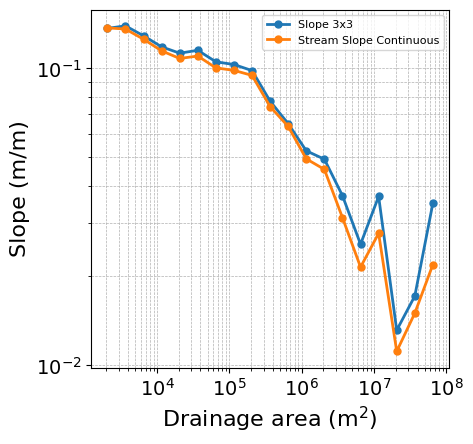

In [3]:
outlet = Outlet.from_xy(711339, 533362, name='outlet')
context = TrialContext(
    out_dir=out_dir, data=TrialData(outlet, dem, resolution=None)
)
result = Trial(f'Trial {outlet.name}', context=context).run()
result.plot(
    config=SlopeAreaPlotConfig(hue=Column.SLOPE_TYPE, legend_font_size=8),
    out_fig=out_fig,
)